# Diana Angélica Martínez Hernández
# Alberto Isaac Pico Lara
## Proyecto final de Minería de Datos

#### Librerías necesarias para exploración y tratamiento de datos

In [7]:
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from random import randint
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display  import Audio
import os

#### Ruta a los archivos de audio de cada uno de los géneros (Prog, Salsa, Electro) y creación de listas con los nombres de los archivos en cada ruta, así como una lista que contenga todas las pistas

In [8]:
ruta_prog = '..\prog'
pistas_p = os.listdir(ruta_prog)
ruta_salsa = '..\salsa'
pistas_s = os.listdir(ruta_salsa)
ruta_electro = '..\electronica'
pistas_e = os.listdir(ruta_electro)
pistas_unif = pistas_p + pistas_s + pistas_e

In [9]:
print('# de pistas prog: ', len(pistas_p))
print('# de pistas de Salsa: ', len(pistas_s))
print('# de pistas de electro: ', len(pistas_e))
print('# total de pistas:', len(pistas_unif))

# de pistas prog:  130
# de pistas de Salsa:  130
# de pistas de electro:  130
# total de pistas: 390


### Ejemplos de análisis de una pista aleatoria por cada género

In [10]:
a = randint(0, 129)

In [11]:
samples_p, sr_p = librosa.load(ruta_prog + '\\' + pistas_p[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_s, sr_s = librosa.load(ruta_salsa + '\\' + pistas_s[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_e, sr_e = librosa.load(ruta_electro + '\\' + pistas_e[a], sr = None, mono = True, offset = 0.0, duration = None)

c:\users\aperalta\downloads\diana\ambientemineria\mineria\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [12]:
print('Tamaño de muestreo (samples) prog: ', len(samples_p))
print('Tasa de muestreo (sampling rate) prog: ', sr_p)
print('Tamaño de muestreo (samples) salsa: ', len(samples_s))
print('Tasa de muestreo (sampling rate) salsa: ', sr_s)
print('Tamaño de muestreo (samples) electro: ', len(samples_e))
print('Tasa de muestreo (sampling rate) electro: ', sr_e)

Tamaño de muestreo (samples) prog:  2644992
Tasa de muestreo (sampling rate) prog:  44100
Tamaño de muestreo (samples) salsa:  2640384
Tasa de muestreo (sampling rate) salsa:  44100
Tamaño de muestreo (samples) electro:  2641536
Tasa de muestreo (sampling rate) electro:  44100


#### Pistas cargadas

In [13]:
print(pistas_p[a])

01 The Grudge_02m_00s__03m_00s.mp3


In [14]:
Audio(ruta_prog + '\\' + pistas_p[a])

Text(0.5, 1.0, '01 The Grudge_02m_00s__03m_00s.mp3')

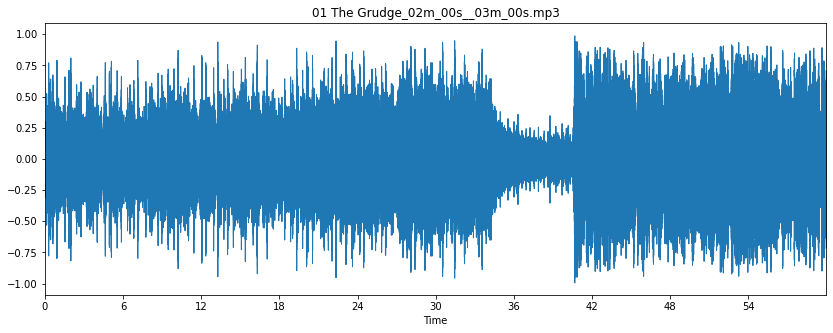

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_p, sr = sr_p)
plt.title(pistas_p[a])

Text(0.5, 1.0, '01 The Grudge_02m_00s__03m_00s.mp3')

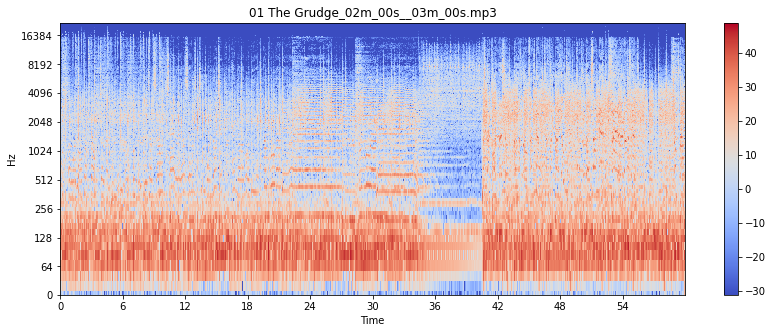

In [16]:
X = librosa.stft(samples_p)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_p, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_p[a])

In [17]:
print(pistas_s[a])

011LLUVIA-EDDIE SANTIAGO_01m_00s__02m_00s.mp3


In [18]:
Audio(ruta_salsa + '\\' + pistas_s[a])

Text(0.5, 1.0, '011LLUVIA-EDDIE SANTIAGO_01m_00s__02m_00s.mp3')

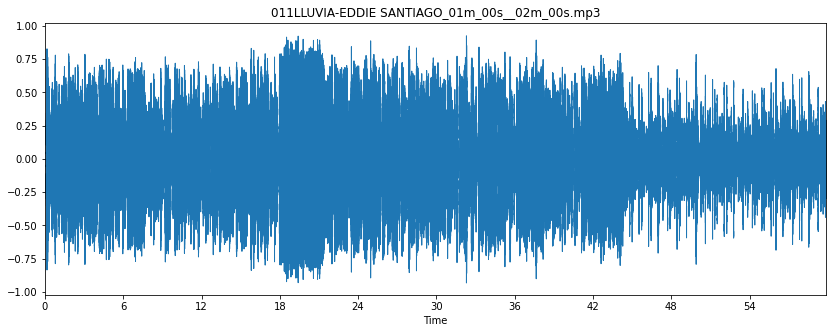

In [19]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_s, sr = sr_s)
plt.title(pistas_s[a])

Text(0.5, 1.0, '011LLUVIA-EDDIE SANTIAGO_01m_00s__02m_00s.mp3')

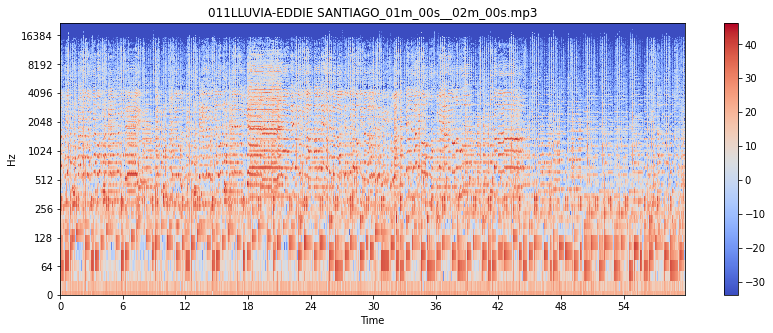

In [20]:
X = librosa.stft(samples_s)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_s, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_s[a])

In [21]:
print(pistas_e[a])

01 WILD MIX_01m_00s__02m_00s.mp3


In [22]:
Audio(ruta_electro + '\\' + pistas_e[a])

Text(0.5, 1.0, '01 WILD MIX_01m_00s__02m_00s.mp3')

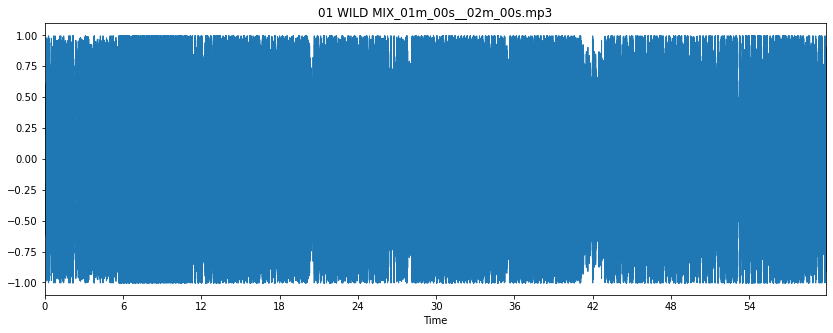

In [23]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_e, sr = sr_e)
plt.title(pistas_e[a])

Text(0.5, 1.0, '01 WILD MIX_01m_00s__02m_00s.mp3')

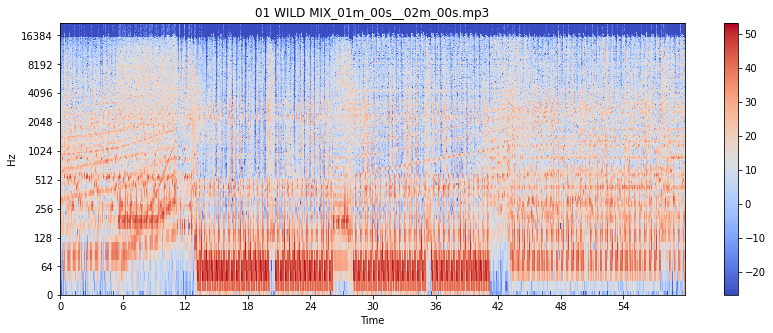

In [24]:
X = librosa.stft(samples_e)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_e, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_e[a])

### Selección de características ejemplo
Algunas de las caracerísticas que se pueden extraer del audio son las siguientes:
- Zero crossing rate: tasa de cambios de signo a través de una señal
- Spectral centroid: Indica en donde está el "centro de masa" (mayor sendidad de muestras) de una pista de audio
- Spectrall Rolloff: La medida de la forma de la señal, representa la frecuencia de la señal debajo de un porcentaje especifico, se trabajará con el 100%
- Mel Frecuency cepstral coeficients: los MFCC de una señal son sunconjuntos de características que describen de manera concisa la forma general del espectro. Esta técnica se usa para el análisis de la voz humana 
- Chroma frecuencies: Representación de los 12 semitonos que existen en la octava musical

En las siguientes líneas se muestra con una pista ejemplo la extracción y visualización de una pista, más adelante se les hará la extracción a las 390 pistas que forman parte del conjunto de datos elegido.